#### Import Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

#### Read the Data

In [3]:
data=pd.read_csv(r"C:\Users\I SEVEN\Desktop\Project\Maksab.xlsx - Maksab Data.csv")
data.head()

,retailer_id,order_created,sales_order_id,order_price,count_of_products,retailer_type,channel,agent_id,visits created,time diff in minutes,visit time,order time,segment
0,112982,"June 9, 2022, 1:34 PM",5040826,829.75,8,Retention,telesales,2313,"June 9, 2022, 1:28 PM",-6,#ERROR!,#ERROR!,#REF!
1,113206,"June 5, 2022, 9:52 PM",4999110,"12,585.75",49,Retention,telesales,5343,"June 5, 2022, 9:43 PM",-9,#ERROR!,#ERROR!,#REF!
2,113206,"June 19, 2022, 5:30 PM",5147632,380,3,Retention,telesales,4083,"June 19, 2022, 5:28 PM",-2,#ERROR!,#ERROR!,#REF!
3,113612,"June 5, 2022, 5:53 PM",4995720,"6,048.5",42,Returning,telesales,2313,"June 5, 2022, 5:44 PM",-8,#ERROR!,#ERROR!,#REF!
4,113662,"June 9, 2022, 6:39 PM",5044706,"1,029.75",12,Returning,telesales,2313,"June 9, 2022, 6:31 PM",-7,#ERROR!,#ERROR!,#REF!


#### Info about the Data


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562 entries, 0 to 2561
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   retailer_id            2562 non-null   int64 
 1   order_created          2562 non-null   object
 2   sales_order_id         2562 non-null   int64 
 3   order_price            2562 non-null   object
 4   count_of_products      2562 non-null   int64 
 5   retailer_type          2562 non-null   object
 6   channel                2562 non-null   object
 7   agent_id               2562 non-null   int64 
 8   visits created         2562 non-null   object
 9   time diff in minutes   2562 non-null   object
 10  visit time             2562 non-null   object
 11  order time             2562 non-null   object
 12  segment                2562 non-null   object
dtypes: int64(4), object(9)
memory usage: 260.3+ KB


In [5]:
data.shape

(2562, 13)

In [6]:
data.columns

Index(['retailer_id', 'order_created', 'sales_order_id', 'order_price',
       'count_of_products', 'retailer_type', 'channel', 'agent_id',
       'visits created', 'time diff in minutes ', 'visit time', 'order time',
       'segment'],
      dtype='object')

In [7]:
data.describe()

,retailer_id,sales_order_id,count_of_products,agent_id
count,2562.000000,2.562000e+03,2562.000000,2562.000000
mean,388796.341920,5.052894e+06,7.438329,4170.364169
std,150930.254756,6.215736e+04,4.983799,1415.674988
min,112982.000000,4.946008e+06,1.000000,1893.000000
25%,265018.000000,4.998870e+06,4.000000,3033.000000
50%,388748.000000,5.046414e+06,6.000000,4218.000000
75%,514048.000000,5.105035e+06,10.000000,5472.000000
max,666048.000000,5.164260e+06,60.000000,5949.000000


In [8]:
data.isnull().sum()

retailer_id              0
order_created            0
sales_order_id           0
order_price              0
count_of_products        0
retailer_type            0
channel                  0
agent_id                 0
visits created           0
time diff in minutes     0
visit time               0
order time               0
segment                  0
dtype: int64

In [9]:
data.describe(include="O")

,order_created,order_price,retailer_type,channel,visits created,time diff in minutes,visit time,order time,segment
count,2562,2562,2562,2562,2562,2562,2562,2562,2562
unique,2258,2073,3,2,2219,281,1,1,1
top,"June 2, 2022, 4:59 PM",215,Retention,retailer,"June 9, 2022, 6:14 PM",0,#ERROR!,#ERROR!,#REF!
freq,3,22,1640,1507,4,604,2562,2562,2562


#### Question1

In [10]:
visits_per_agent=data.groupby('agent_id')['visits created'].count()
visits_per_agent

agent_id
1893     86
1899    122
1908     98
2313    104
2415     94
2439     80
3033    102
3069     92
3207    102
3507     93
3843     75
4083    110
4170     96
4218     93
4533    116
5196    111
5343    121
5463     92
5469     99
5472     81
5550     69
5586     68
5676    104
5730    129
5934     86
5940     50
5949     89
Name: visits created, dtype: int64

#### Question 2

In [11]:
unique_retailers=data.groupby('agent_id')['retailer_id'].nunique()
unique_retailers

agent_id
1893     86
1899    120
1908     95
2313    103
2415     87
2439     80
3033    101
3069     88
3207     96
3507     93
3843     74
4083    103
4170     92
4218     91
4533    114
5196    101
5343    113
5463     87
5469     95
5472     80
5550     65
5586     64
5676     92
5730    109
5934     81
5940     47
5949     87
Name: retailer_id, dtype: int64

In [12]:
unique_visitt=(unique_retailers/visits_per_agent)*100
unique_visitt

agent_id
1893    100.000000
1899     98.360656
1908     96.938776
2313     99.038462
2415     92.553191
2439    100.000000
3033     99.019608
3069     95.652174
3207     94.117647
3507    100.000000
3843     98.666667
4083     93.636364
4170     95.833333
4218     97.849462
4533     98.275862
5196     90.990991
5343     93.388430
5463     94.565217
5469     95.959596
5472     98.765432
5550     94.202899
5586     94.117647
5676     88.461538
5730     84.496124
5934     94.186047
5940     94.000000
5949     97.752809
dtype: float64

In [13]:
data.columns

Index(['retailer_id', 'order_created', 'sales_order_id', 'order_price',
       'count_of_products', 'retailer_type', 'channel', 'agent_id',
       'visits created', 'time diff in minutes ', 'visit time', 'order time',
       'segment'],
      dtype='object')

#### Question 3


In [14]:
success_visit=data.groupby('visits created')['sales_order_id'].nunique()
success_visit

visits created
June 1, 2022, 1:41 PM    1
June 1, 2022, 2:08 PM    1
June 1, 2022, 2:31 PM    1
June 1, 2022, 2:36 PM    1
June 1, 2022, 2:41 PM    1
                        ..
June 9, 2022, 9:09 PM    1
June 9, 2022, 9:11 PM    1
June 9, 2022, 9:17 PM    1
June 9, 2022, 9:26 PM    1
June 9, 2022, 9:30 PM    1
Name: sales_order_id, Length: 2219, dtype: int64

#### Question 4

In [15]:
result = pd.pivot_table(  
    data,
    index="agent_id",
    columns='retailer_type',
    aggfunc={
        'sales_order_id': 'count',
        'retailer_id': 'nunique',
        'order_price': 'sum'
    },
) 
result.head()


order_price  \
retailer_type                                          Retention   
agent_id                                                           
1893           278.758521,3411,056497.51,228.51,6171,633.6854...   
1899           717.258471,092582.753,445.11,007.5682.25873.25...   
1908           1,507.71,7091,523.991,9791,1112,503217281.2599...   
2313           829.751,356.75898807.5210.251,645823.985,27599...   
2415           1,083163.56871,5381,594.5175.5271.252,2982,148...   

                                                                  \
retailer_type                                          Returning   
agent_id                                                           
1893           1,422.38351,215215.75826.72227811.731,739704.2...   
1899           1,189.75855.488312,116849.19838.46806.75834.25...   
1908           1,786.23542.51,309.5271.25325.5168202.25325.57...   
2313           6,048.51,029.752121,121.251,0438002,113.5883.5...   
2415           949.61860.52071,711269.25912.992,290.73922.758...   

                                                                 retailer_id  \
retailer_type                                        acquisition   Retention   
agent_id                                                                       
1893                                                1,123.5486.5          53   
1899           853.48895254.25816.14821.5910879.5847920972.98...          77   
1908                                                  219.51,479          46   
2313                                                       108.5          66   
2415                        1,843.5333.751,260.97336.65843.23840          58   

                                    sales_order_id                        
retailer_type Returning acquisition      Retention Returning acquisition  
agent_id                                                                  
1893                 31           2             53        31           2  
1899                 31          12             79        31          12  
1908                 47           2             48        48           2  
2313                 36           1             67        36           1  
2415                 24           5             64        24           6

#### Question 5


In [16]:
segment_analysis=pd.pivot_table(
    data,
    index='segment',
    values=['visits created','sales_order_id'],
    aggfunc={
        'visits created': 'count',
        'sales_order_id': 'count',
    },
)
segment_analysis

,sales_order_id,visits created
segment,,
#REF!,2562,2562


#### Visualization

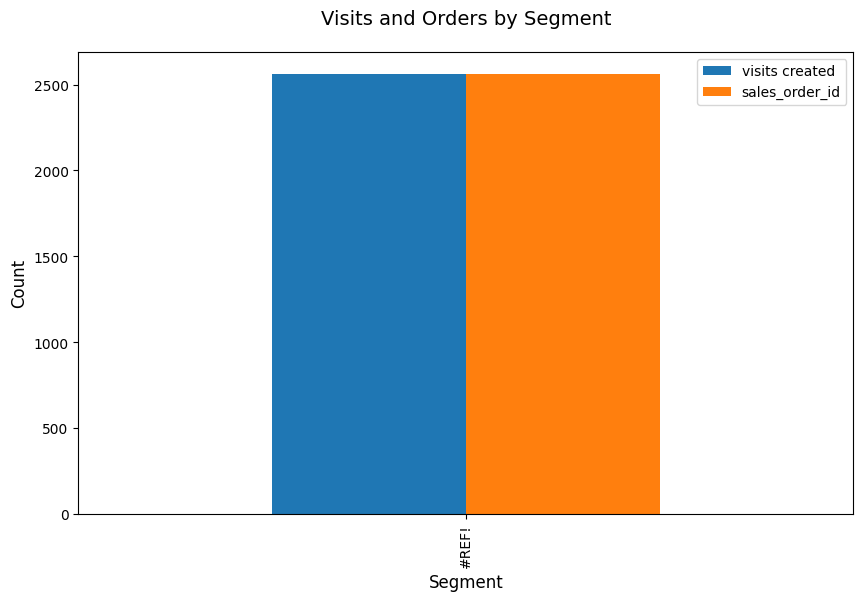

In [17]:
segment_analysis[['visits created', 'sales_order_id']].plot(kind='bar', figsize=(10, 6))
plt.title('Visits and Orders by Segment', pad=20, fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Segment', fontsize=12)
plt.show()

#### Question 6

In [ ]:

data['order_price'] = pd.to_numeric(data['order_price'], errors='coerce')


agent_stats = data.groupby('agent_id').agg(
    total_orders=('sales_order_id', 'count'),
    total_revenue=('order_price', 'sum'),
)


agent_stats['group'] = pd.qcut(agent_stats['total_revenue'],
                               q=[0, 0.3, 0.7, 1],
                               labels=['Low', 'Medium', 'High'])

agent_stats

,total_orders,total_revenue,group
agent_id,,,
1893,86,24081.30,Low
1899,122,54479.10,High
1908,98,38116.47,High
2313,104,40665.70,High
2415,94,33731.29,Medium
2439,80,28846.14,Medium
3033,102,36627.72,High
3069,92,31154.57,Medium
3207,102,27969.83,Medium


#### Visualization

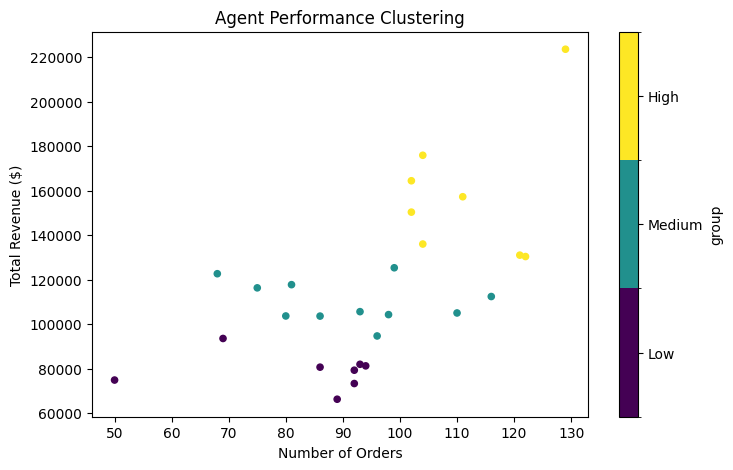

In [ ]:

agent_stats.plot.scatter(x='total_orders', y='total_revenue',
                        c='group', colormap='viridis', figsize=(8,5))
plt.title("Agent Performance Clustering")
plt.xlabel("Number of Orders")
plt.ylabel("Total Revenue ($)")

plt.show()

#### Visualization Count of Products per Order

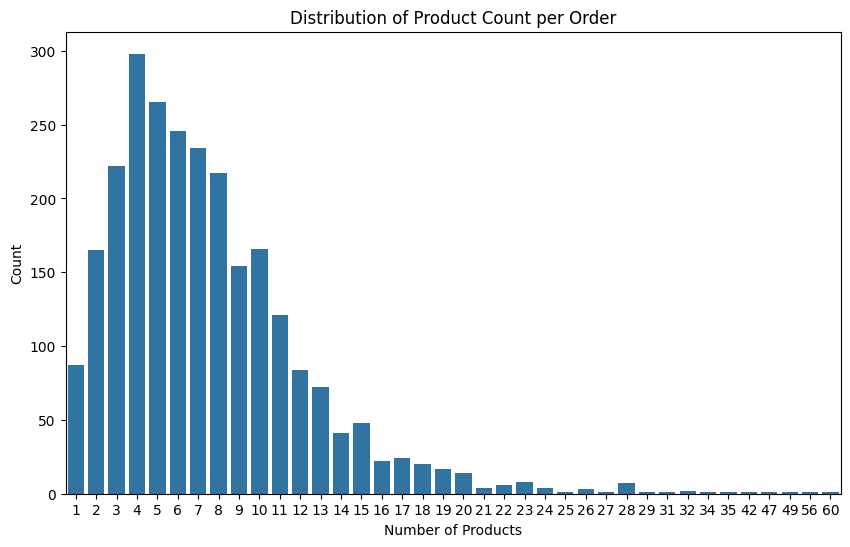

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='count_of_products')
plt.title('Distribution of Product Count per Order')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

####  Retailer Types Distribution

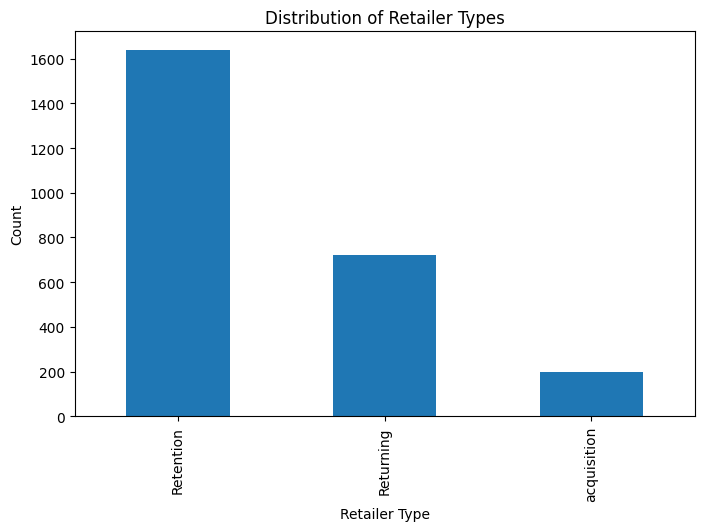

In [20]:
plt.figure(figsize=(8, 5))
data['retailer_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Retailer Types')
plt.xlabel('Retailer Type')
plt.ylabel('Count')
plt.show()

#### Order Price Outliers


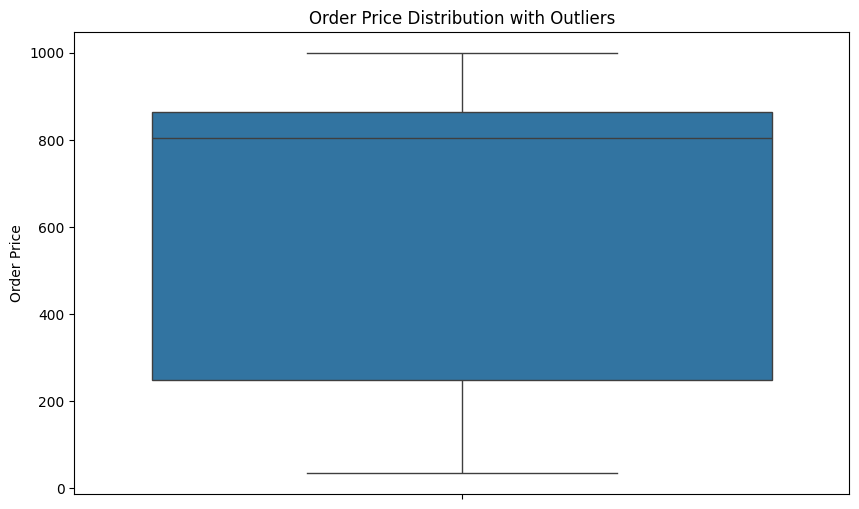

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, y='order_price')
plt.title('Order Price Distribution with Outliers')
plt.ylabel('Order Price')
plt.show()